## 1. Check data properties
### droplets

#### scan file to get a summary data frame

In [2]:
with open("./data/count_matrix.csv", "r") as f1, open("./data/peak_names_out.csv", "r") as f2:
    droplets = f1.readline().split(",") 
    drop_hg_cnts = [0] * len(droplets)
    drop_mm_cnts = [0] * len(droplets)
    drop_hg_geneCover =[0] * len(droplets)
    drop_mm_geneCover = [0] * len(droplets)

    #gene_hg_cnts = []
    #gene_mm_cnts = []
    #gene_hg_dropCover = []
    #gene_mm_dropCover = []
    for i, (l1, l2) in enumerate(zip(f1, f2)):
        if i % 10000 == 0:
            print(f"processing line {i} on gene: {l2}")
        
        #gene_cnts = sum(int(x) for x in l1.rstrip().split(","))
        #gene_dropCover = sum([int(x) > 0 for x in l1.rstrip().split(",")]) 
        if l2.startswith("hg19"):
            for j, c in enumerate(l1.split(",")):
                drop_hg_cnts[j] += int(c)
                drop_hg_geneCover[j] += (int(c) > 0 )
                #gene_hg_cnts.append(gene_cnts)
                #gene_hg_dropCover.append(gene_dropCover)
        elif l2.startswith("mm10"):
            for j, c in enumerate(l1.split(",")):
                drop_mm_cnts[j] += int(c)
                drop_mm_geneCover[j] += (int(c) > 0)
                #gene_mm_cnts.append(gene_cnts)
                #gene_mm_dropCover.append(gene_dropCover)
        else:
            raise("Neither a human or mouse gene")

processing line 0 on gene: hg19_chr1:713971-714221

processing line 10000 on gene: hg19_chr1:203276194-203276444

processing line 20000 on gene: hg19_chr11:60253518-60253768

processing line 30000 on gene: hg19_chr12:123854345-123854595

processing line 40000 on gene: hg19_chr15:77197672-77197922

processing line 50000 on gene: hg19_chr17:37931823-37932073

processing line 60000 on gene: hg19_chr19:28503436-28503686

processing line 70000 on gene: hg19_chr2:203438666-203438916

processing line 80000 on gene: hg19_chr22:44734840-44735090

processing line 90000 on gene: hg19_chr4:79579176-79579426

processing line 100000 on gene: hg19_chr6:32408950-32409200

processing line 110000 on gene: hg19_chr8:580985-581235

processing line 120000 on gene: hg19_chrX:9434513-9434763

processing line 130000 on gene: mm10_chr1:172590670-172590920

processing line 140000 on gene: mm10_chr10:128044146-128044396

processing line 150000 on gene: mm10_chr11:109585121-109585371

processing line 160000 on ge

Save the summary data, since it takes 15min.

In [6]:
import pandas as pd
df_droplets = pd.DataFrame({"drop_hg_cnts": drop_hg_cnts,
                            "drop_mm_cnts": drop_mm_cnts, 
                            "drop_hg_geneCover": drop_hg_geneCover,
                            "drop_mm_geneCover": drop_mm_geneCover})
df_droplets.to_csv("mid_df_droplets.csv", index=False)

#### This part can be done without running previous part.

In [7]:
del df_droplets
import pandas as pd
df_droplets = pd.read_csv("mid_df_droplets.csv")

In [10]:
df_droplets.dtypes

drop_hg_cnts         int64
drop_mm_cnts         int64
drop_hg_geneCover    int64
drop_mm_geneCover    int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import numpy as np

number of droplets: 5578

In [13]:
df_droplets.shape

(5578, 4)

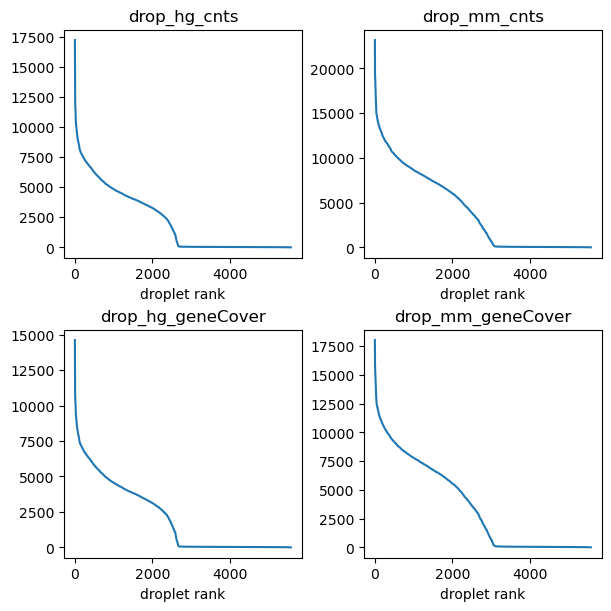

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')
pooln = ["drop_hg_cnts", "drop_mm_cnts", "drop_hg_geneCover", "drop_mm_geneCover"]
for i in range(2):
    for j in range(2):
            cur = i * 2 + j
            axs[i][j].plot(sorted(df_droplets[pooln[cur]], reverse=True))
            axs[i][j].set_xlabel('droplet rank')
            axs[i][j].set_title(pooln[cur])

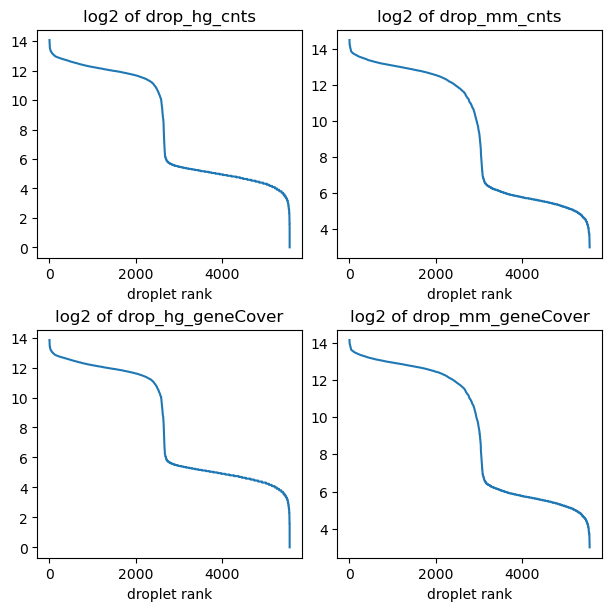

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')
pooln = ["drop_hg_cnts", "drop_mm_cnts", "drop_hg_geneCover", "drop_mm_geneCover"]
for i in range(2):
    for j in range(2):
            cur = i * 2 + j
            axs[i][j].plot(sorted(np.log2(df_droplets[pooln[cur]]), reverse=True))
            axs[i][j].set_xlabel('droplet rank')
            axs[i][j].set_title("log2 of " + pooln[cur])

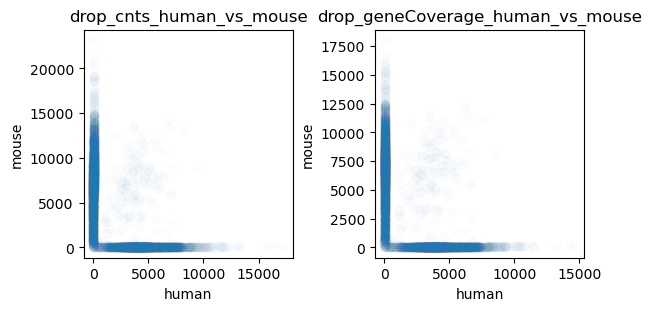

In [23]:
fig2, axs2 = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pool_x = [df_droplets["drop_hg_cnts"], df_droplets["drop_hg_geneCover"]]
pool_y = [df_droplets["drop_mm_cnts"], df_droplets["drop_mm_geneCover"]]
pooln = ["drop_cnts_human_vs_mouse", "drop_geneCoverage_human_vs_mouse"]
for i in range(2):
        axs2[i].scatter(pool_x[i], pool_y[i],alpha=0.01)
        axs2[i].set_xlabel('human')
        axs2[i].set_ylabel('mouse')
        axs2[i].set_title(pooln[i])

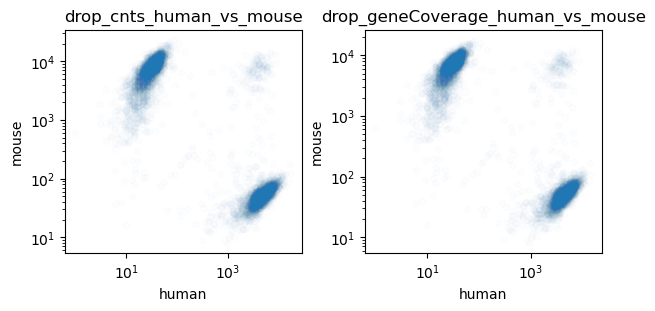

In [24]:
fig2, axs2 = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pool_x = [df_droplets["drop_hg_cnts"], df_droplets["drop_hg_geneCover"]]
pool_y = [df_droplets["drop_mm_cnts"], df_droplets["drop_mm_geneCover"]]
pooln = ["drop_cnts_human_vs_mouse", "drop_geneCoverage_human_vs_mouse"]
for i in range(2):
        axs2[i].scatter(pool_x[i], pool_y[i], s=20, alpha=0.01)
        axs2[i].set_yscale('log')
        axs2[i].set_xscale('log')
        axs2[i].set_xlabel('human')
        axs2[i].set_ylabel('mouse')
        axs2[i].set_title(pooln[i])